In [51]:
import sympy
import numpy

from matplotlib import pyplot
%matplotlib inline

In [52]:
z = sympy.Symbol("z",real=True)

logistic = 1/(1+sympy.exp(-z))
logistic

1/(1 + exp(-z))

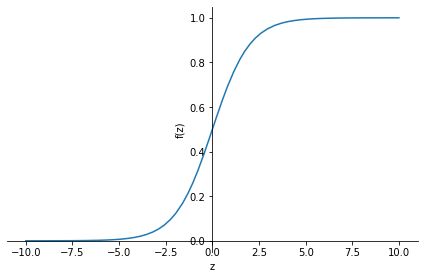

In [53]:
sympy.plotting.plot(logistic);

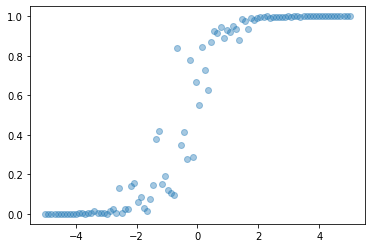

In [54]:
#synthetic data
x_data = numpy.linspace(-5,5,100)
w = 2
b = 1
numpy.random.seed(0)
z_data = w * x_data + b + numpy.random.normal(size = len(x_data))
y_data = 1/(1+numpy.exp(-z_data))

pyplot.scatter(x_data,y_data,alpha=0.4);

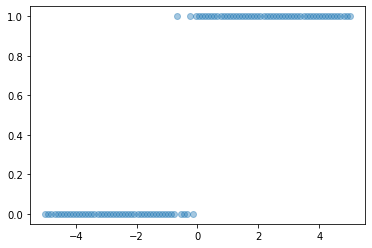

In [55]:
y_data = numpy.where(y_data >= 0.5,1,0)
pyplot.scatter(x_data,y_data,alpha=0.4)

In [56]:
badloss =  (2 - 1/(1+ sympy.exp(-z)))**2 + \
          (-1 - 1/(1+ sympy.exp(-20*z)))**2  + \
          (5 - 1/(1+ sympy.exp(-5*z)))**2
badloss
isitbadtoo = (1/(1+ sympy.exp(-2)) - 1/(1+ sympy.exp(-z)))**2 + \
          (1/(1+ sympy.exp(1)) - 1/(1+ sympy.exp(-20*z)))**2  + \
          (1/(1+ sympy.exp(-5)) - 1/(1+ sympy.exp(-5*z)))**2

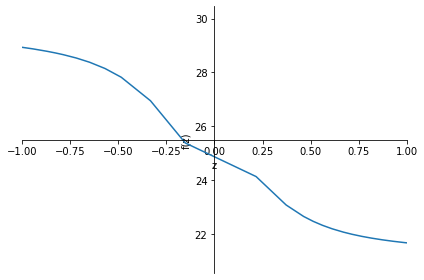

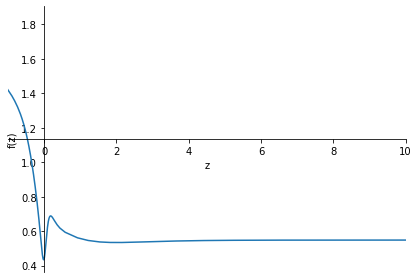

In [57]:
sympy.plotting.plot(badloss,xlim=(-1,1));
sympy.plotting.plot(isitbadtoo,xlim=(-1,10));

In [58]:
Iprime = logistic.diff(z)
Iprime

exp(-z)/(1 + exp(-z))**2

In [59]:
a, y = sympy.symbols("a y",real=True)

In [60]:
dLda = (y-a)/a/(1-a)
dLda

(-a + y)/(a*(1 - a))

In [61]:
L = sympy.integrate(dLda,a)
L

y*log(a) + (1 - y)*log(a + (1 - 2*y)/(2*y - 1))

In [62]:
sympy.simplify(L)

y*log(a) - (y - 1)*log(a - 1)

In [63]:
L = -y*sympy.log(a) + (y-1)*sympy.log(1-a)
L

-y*log(a) + (y - 1)*log(1 - a)

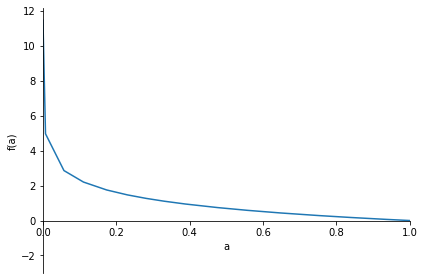

In [64]:
sympy.plotting.plot(-sympy.log(a),xlim=(0,1));

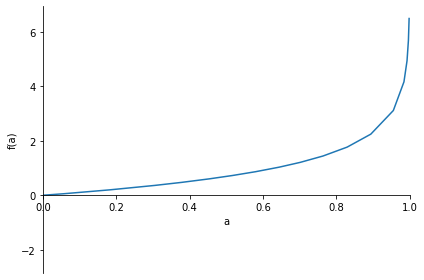

In [65]:
sympy.plotting.plot(-sympy.log(1-a),xlim=(0,1));

In [66]:
logistic

1/(1 + exp(-z))

In [67]:
w,b,x,y = sympy.symbols("w b x y")
logistic = 1/(1+sympy.exp(-w*x-b))

Loss = -y*sympy.log(logistic) - (1-y)*sympy.log(1-logistic)
Loss

-y*log(1/(exp(-b - w*x) + 1)) - (1 - y)*log(1 - 1/(exp(-b - w*x) + 1))

In [68]:
#import the autograd-wrapped version of numpy
from autograd import numpy

In [69]:
#import the gradient calculator
from autograd import grad

In [70]:
#note: the namespace numpy is the autograd wrapper to Numpy
def logistic(z):
    '''The logistic function'''
    return 1/(1+numpy.exp(-z))

def logistic_model(params,x):
    '''A prediction model based on the logistic function composed with ws+b
    Arguments:
        params: array(w,b) of model parameters
        x : array of x data'''
    w = params[0]
    b = params[1]
    z = w * x + b
    y = logistic(z)
    return y

def log_loss(params,model,x,y):
    '''The logistic loss function
    Arguments:
        params: array(w,b) of medel parameters
        model:  the Python function for the logistic model
        x, y:   arrays of input data to the model'''
    y_pred = model(params,x)
    return -numpy.mean(y*numpy.log(y_pred) + (1-y) * numpy.log(1-y_pred))

In [71]:
gradient = grad(log_loss)

In [72]:
type(gradient)

function

In [73]:
numpy.random.seed(0)
params = numpy.random.rand(2)
print(params)

[0.5488135  0.71518937]


In [74]:
gradient(params,logistic_model,x_data,y_data)

array([-0.42734877,  0.08274066])

[1. 1.]
Optimized value of w is 2.73095033006471 vs. true value: 2
Optimized value of b is 0.6974552315981599 vs. true value: 1
Exited after 5000 iterations


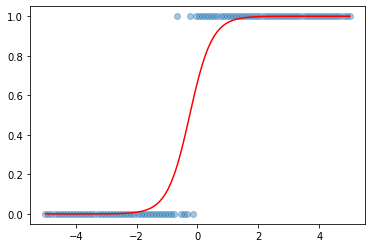

In [75]:
max_iter = 5000
i = 0
descent = numpy.ones(len(params))
print(descent)


while numpy.linalg.norm(descent) > 0.001 and i < max_iter:
    descent = gradient(params, logistic_model,x_data,y_data)
    params = params - descent * 0.01
    i += 1
print("Optimized value of w is {} vs. true value: 2".format(params[0]))
print("Optimized value of b is {} vs. true value: 1".format(params[1]))
print("Exited after {} iterations".format(i))


pyplot.scatter(x_data,y_data,alpha=0.4)
pyplot.plot(x_data,logistic_model(params,x_data),"-r")